# Section:  Approximating functions - Lecture 2

## [2] Polynomial interpolation

Continue our discussion from the last Lecture, we would like to represent a function nicely by a polynomial. 
By "nicely" we mean that the error between the function and the polynomial is small.

Given a function $f(x)$, and a polynomial interpolation $p(x)$, we can define the error, the so-called infinity-norm, as 
$$\|f(x)-p(x)\|_{\infty} = \sup_{x}|f(x)-p(x)|.$$
According to Weierstrass Approximation Theorem, there must exists some polynomial $p(x)$ such that the error is small if $f$ is continous.

But how can we construct this polynomial? A simple answer is that we just choose $n+1$ points on the interval and interpolate a polynomial that passes through these $n+1$ data points, and hopefully, the error will decrease as we choose more and more points.

In the following we try to interpolate the function $f(x) = \frac{1}{1+15x^2}$, $x\in[-1,1]$, using various node and see if some of them is better than others.

### [2.1] Random Nodes
We interpolate the function on randomly selected nodes, 
$$\{x_k\}, \quad k=0,1,2,\cdots,n,$$ 
by a polynomial $p(x)$. Then, $p(x)$ is a $n$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

#### Remark:
We'll use packages LinearAlgebra for solving the polynomial and PyPlot for plotting. Type in julia

```julia
using Pkg; 
Pkg.add("PyPlot")
```

if you don't have PyPlot installed.

In [1]:
# using Pkg; Pkg.add("PyPlot")
using LinearAlgebra
using PyPlot

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Then define the function to interpolate for later usage.

In [2]:
# We define the function to interpolate
f(x)=1/(1+15x^2)

f (generic function with 1 method)

We define a function that returns the polynomial as a function for given function and nodes for later usage.

In [3]:
# Define a function to return the polynomial(as as function)
function Interpolate(f::Function,x_nodes::Any)
    # f: The function to interpolate
    # x_nodes: the given nodes for interpolation
    
    # n: the number of nodes
    n=length(x_nodes);
    
    # Calculate coeffiencts of the polynomial
    A=zeros(n,n);
    for i=1:n
        A[:,i] = x_nodes.^(n-i)
    end
    c = A\f.(x_nodes);
    
    # Construct the polynomial
    function p_inter(x)
        p=0;
        for i=1:n
            p += c[i]*x^(n-i)
        end
        return p
    end
    
    # retunrs the polynomial(as a function)
    return p_inter
end

Interpolate (generic function with 1 method)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Also we define a function to plot the function and the polynomial on $[-1,1]$, which can be used later on.

In [4]:
# A function for plotting f, and the interpolated polynomial p
function PlotInterpolation(f::Function, p::Function,x_nodes::Any,nd=0::Int,
        labels=["f(x)","p(x)"]::Array{String,1},l=1000::Int)
    # f: The function to interpolate
    # p: The polynomial interpolation
    # x_nodes: the given nodes to interpolate
    # nd: there are 'n+1' nodes if set to 0, 'n' nodes otherwise. Just affect the title of the plot.
    # labels: The labels of the function and polynomial as a vector of two strings
    # l: length of linspace
    
    # n: number of nodes
    n=length(x_nodes);
    
    # Construct the linspace
    xl=range(-1,stop=1,length=l);
    
    #Plot the functions
    plot(xl, f.(xl),label=labels[1]);
    plot(xl, p.(xl),label=labels[2]);
    plot(x_nodes,f.(x_nodes),"or");
    plt.legend();
    if nd==0
        plt.title("n=$(n-1)");
    else
        plt.title("n=$(n)")
    end
    println("Max. error=",maximum(abs.(p.(xl)-f.(xl))));
end

PlotInterpolation (generic function with 4 methods)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Finally, we define a function that choose $n+1$ random points on $[-1,1]$ and plot the interpolating polynomial and f(x).

In [5]:
# a function that construct n+1 random points and plot the interpolating polynomial and f(x).
function RandomNodes(f::Function,n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Generate n+1 random points on [-1,1] with ascending order
    x_nodes=2*rand(n+1).-1;
    sort(x_nodes);
    
    # use the defined functions to plot
    p = Interpolate(f,x_nodes);
    PlotInterpolation(f,p,x_nodes);
end

RandomNodes (generic function with 1 method)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Now, we plot the results for $n=5,10,20$ using above functions.

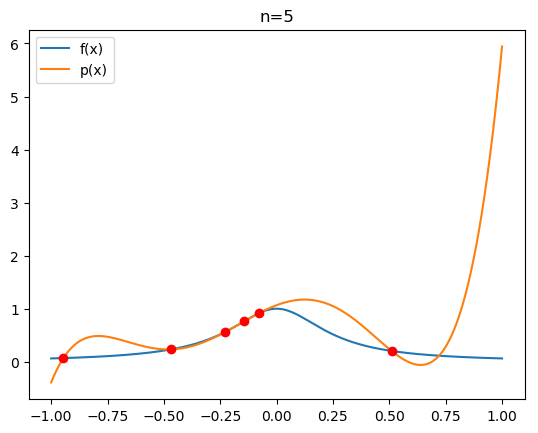

Max. error=5.881031687178064


In [7]:
n=5
RandomNodes(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

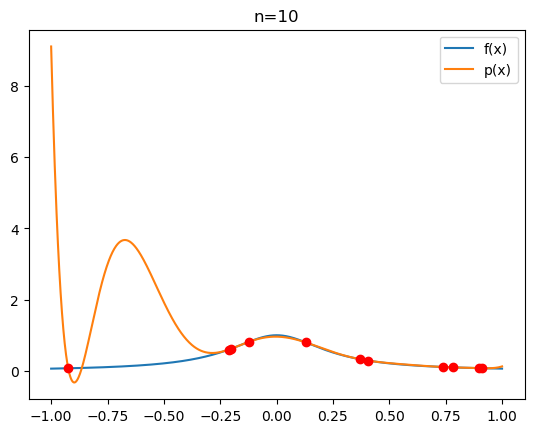

Max. error=9.04423649960026


In [8]:
n=10
RandomNodes(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

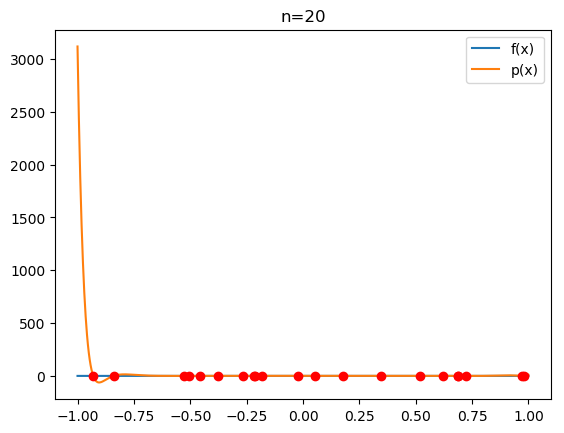

Max. error=3117.384806654056


In [9]:
n=20
RandomNodes(f,n);

### Observation

Intuitively we know that it is not good to have only few points. So as we expect the result (in terms of infinity-norm of the error) is not so good for $n=t$ and $n=10$. What surprising is that The result is terrible for $n=20$. So it looks like it is also not good to have too many points. 

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### [2.2] Equally spaced Nodes
We interpolate the function on equally spaced nodes 
$$x_k = -1 + 2\frac{k}{n} \quad k=0,1,2,\cdots,n,$$
by a polynomial $p(x)$. Then, $p(x)$ is a $n$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

We write a function that choose $n+1$ equally spaced points on $[-1, 1]$ and plot the interpolating polynomial and $f(x)$.

In [10]:
# a function that construct n+1 equally spaced point and plot the interpolating polynomial and f(x).
function EquallySpaced(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Generate n+1 equally spaced points on [-1,1]
    x_nodes=2*(0:n)/n .-1
    
    # use defined functions to plot
    p = Interpolate(f,x_nodes);
    PlotInterpolation(f,p,x_nodes);
end

EquallySpaced (generic function with 1 method)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Now, we plot the results for $n=5,10,20$ using above functions.

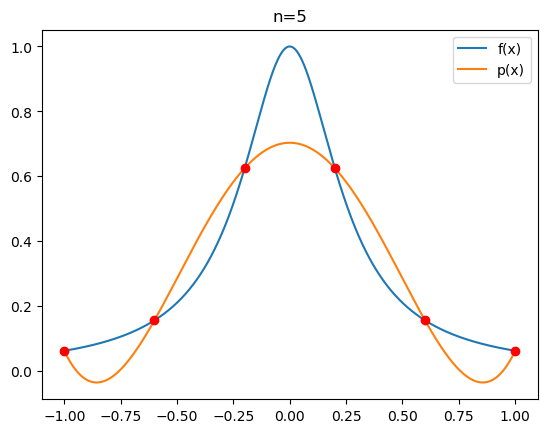

Max. error=0.2966178477489869


In [11]:
n=5
EquallySpaced(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

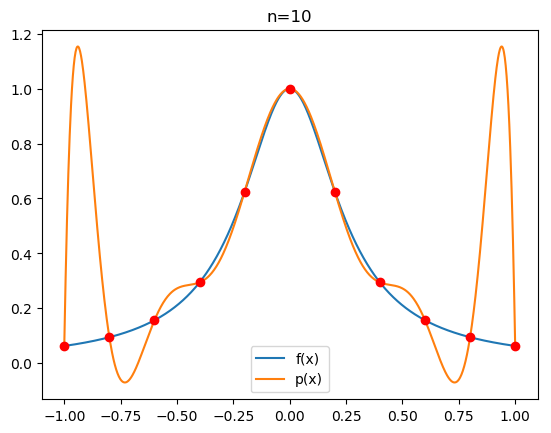

Max. error=1.0837349558797038


In [12]:
n=10
EquallySpaced(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

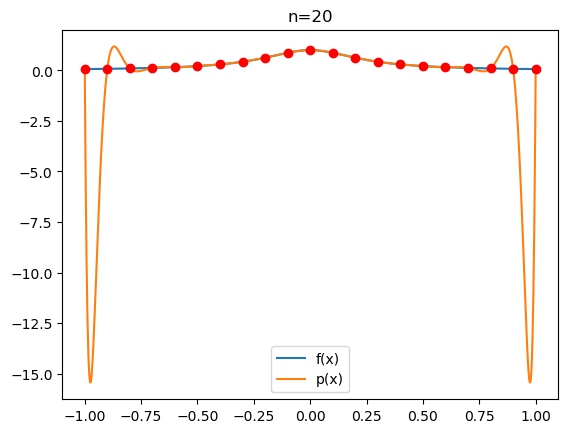

Max. error=15.499652626597996


In [13]:
n=20
EquallySpaced(f,n);

#### Remark:
One should note that, equally spaced nodes is not a good choice of interpolating a function as there will be oscilations at the edge of the interval, the so-called **Runge's phenomenon**. See [wiki](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) for fruther details.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### [2.3] Chebyshev Nodes of the first kind

Consider polynomial interpolation of some function $f(x)$ on $[-1, 1]$ using Chebyshev Nodes of the first kind:
$$x_k = \cos\left(\frac{2k-1}{2n}\pi\right) \quad k=1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n-1$ degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.

We write a function that choose $n$ Chebyshev nodes of the first kind on $[-1, 1]$ and plot the interpolating polynomial and $f(x)$.

In [14]:
# a function that construct n Chebyshev nodes of the first kind and plot the interpolating polynomial
function ChebyshevNodes1(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Construct n Chebyshev Nodes of the first kind on [-1,1]
    x_nodes = cos.(((1:n).-0.5)*pi/(n));
    
    # use defined functions to plot
    p = Interpolate(f,x_nodes);
    PlotInterpolation(f,p,x_nodes,1);
end

ChebyshevNodes1 (generic function with 1 method)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Now, we plot the results for $n=5,10,20$ using above functions.

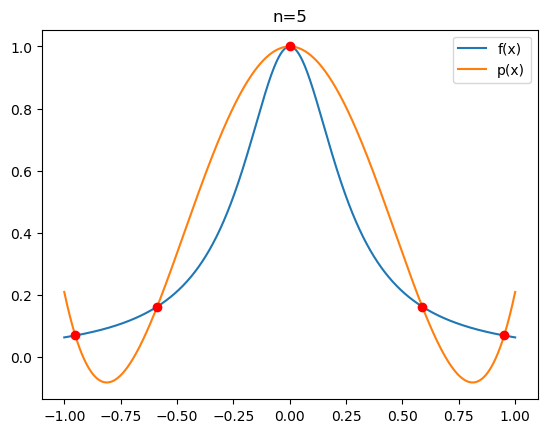

Max. error=0.298909068865834


In [15]:
n=5
ChebyshevNodes1(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

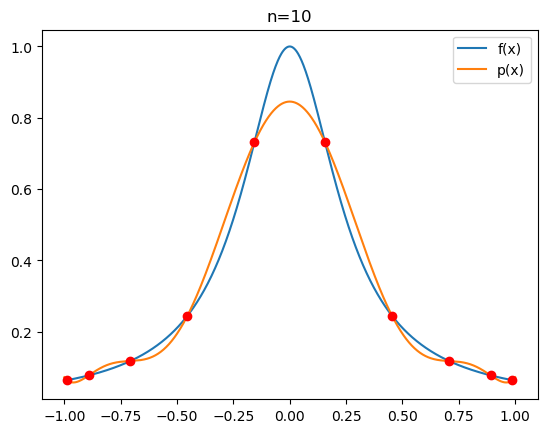

Max. error=0.15457521395748808


In [16]:
n=10
ChebyshevNodes1(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

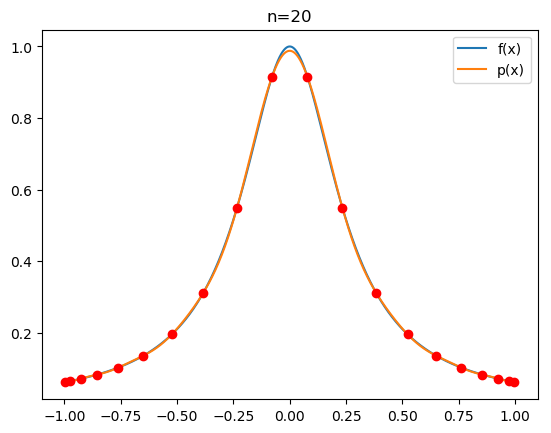

Max. error=0.01209018802937567


In [17]:
n=20;
ChebyshevNodes1(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### [2.4] Chebyshev Nodes of the second kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the second kind:
$$x_k = \cos\left(\frac{k}{n}\pi\right) \quad k=0,1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n$-th degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.

#### Remark: 
The difference between the Chebyshev nodes of the first and the second kind is that the second one includes boundary points, while the first one does not.

We write a function that choose $n+1$ Chebyshev nodes of the second kind on $[-1, 1]$ and plot the interpolating polynomial and $f(x)$.

In [18]:
# a function that construct n+1 Chebyshev nodes of the second kind and plot the interpolating polynomial and f(x)
function ChebyshevNodes2(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Generate n+1 Chebyshev Nodes of the second kind on [-1,1]
    x_nodes = cos.(((0:n)*pi/n));
    
    # use defined functions to plot
    p = Interpolate(f,x_nodes);
    PlotInterpolation(f,p,x_nodes);
end

ChebyshevNodes2 (generic function with 1 method)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

Now, we plot the results for $n=5,10,20$ using above functions.

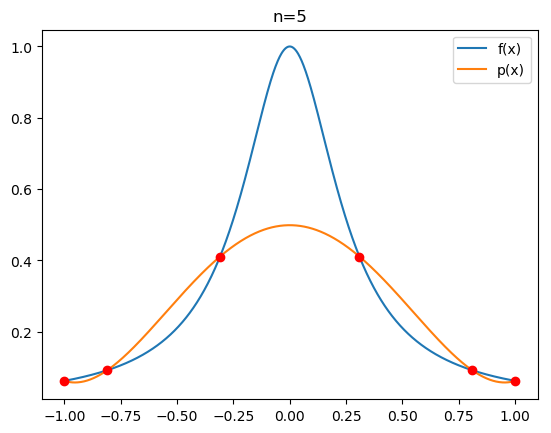

Max. error=0.5010251354266867


In [19]:
n=5
ChebyshevNodes2(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

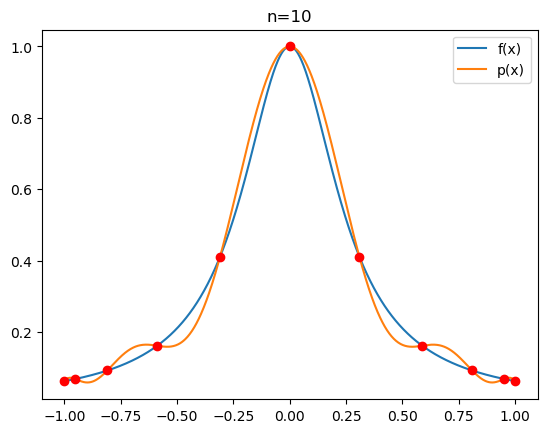

Max. error=0.06804959725044601


In [20]:
n=10
ChebyshevNodes2(f,n);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

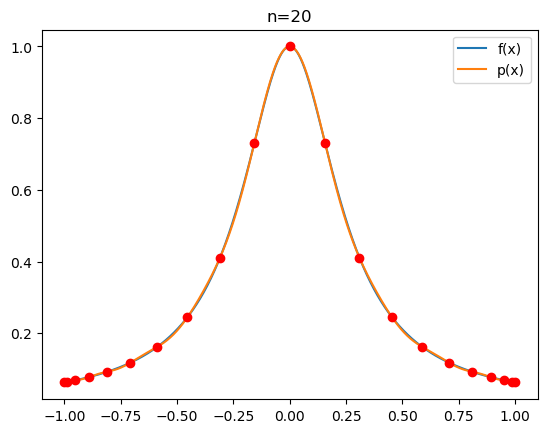

Max. error=0.005663989698434513


In [21]:
n=20
ChebyshevNodes2(f,n);

## Conclusion

So far we have show examples of nodes chosen methodology for interpolating a function. Some of them are good and some of them are bad. Is it always good/bad in general? Is there a good way to design or to determine what kind of nodes is good or bad? That will be the topic of the next lecture.